# Cadena de nacimiento y muerte
## Simulación

En este notebook simularemos el comportamiento de una cadena de nacimiento y muerte con una población finita $d$. Es importante notar que en este caso tenemos un estado absorbente (a saber, el $0$) y uno reflejante (el $d$) dado que si la población llega a su límite decrece y si ya no hay población es imposible que crezca.


**Nico Quijada**

### Diseño de la matriz
Para esta modelación programaremos una matriz estocástica que resuma la dinámica de la cadena, muy similar a cómo lo hicimos con la cadena de Ehrenfest.

In [2]:
#Importamos las bibliotecas necesarias
import numpy as np 
from numpy.linalg import matrix_power
import random
import matplotlib.pyplot as plt

In [28]:
###Definición de las probabilidades de transición
p = 0.5
q = 1-p


###Construcción de la matriz
s = 100 #Definimos la cantidad de individuos presentes en la población (s)
M = np.zeros((s+1,s+1)) #Creamos una matriz de ceros añadiendo una entrada para el estado 0.
M[0,0] = 1 #Tenemos que P(0,x)=0 si x > 0 y 1 si x = 0 i.e., ya no tenemos población
M[s,s-1] = 1 #En el caso de que la población llegue a su límite, ya no podemos quedarnos en ella y tenemos que regresar

for i in range(1,s): #Rellenamos el resto de la matriz que modela al proceso
    M[i,i-1] = q
    M[i,i+1] = p


#Podemos descomentar la siguiente línea para observar la forma de la matriz.
print(M)

[[1.  0.  0.  ... 0.  0.  0. ]
 [0.5 0.  0.5 ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 0.  1.  0. ]]


### Simulación del proceso 
Obtenida la matriz, simulamos el proceso. Para ello requerimos dar una distribución inicial de probabilidad.


In [65]:
#Programamos nuestra distribución inicial.
d0 = np.zeros((1,s+1)) #Vector de ceros para configurar la d.i.

#Configuración de la distribución inicial
#En las siguientes líneas uno puede programar su propia distribución. No olvidar que debe quedar normalizada
#de tal forma que la suma de las probabilidades sea 1

d0[0,50]=0.4
d0[0,25]=0.6
print(d0)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


Ahora simulamos

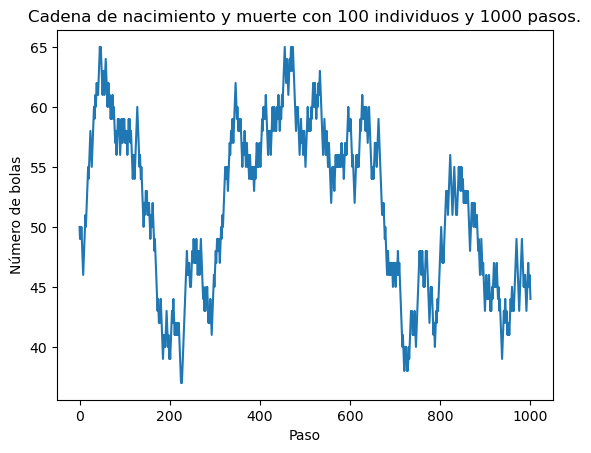

In [92]:
def exp(indiv):
    #Esta función recibe un número de individuos y regresa el número de individuos siguientes
    dn = np.zeros((1,s+1)) #Crea un vector de 1 fila y s+1 columnas
    dn[0][indiv] = 1 #La probabilidad de que tengamos un número "indiv" de individuos es exactamente 1.
    dtrans = dn@M #Transicionamos la matriz
    numin = list(np.random.uniform(0,1)<np.cumsum(dtrans)).index(True) #De la nueva matriz obtenemos un nuevo número de individuos
    return numin #regresa el número de individuos nuevo


def sim_canam(di, pasos):
    #Esta función toma la distribución inicial y número de pasos y regresa una realización de la cadena
    r0 = list(np.random.uniform(0,1)<np.cumsum(d0)).index(True) #Obtención del punto de partida
    ruta = [r0] #Lo guardamos en una lista donde iremos agregando cada uno de los pasos.
    for i in range(pasos): #Para cada paso 
        ruta.append(exp(ruta[-1])) #Realizamos el experimento con la función anterior
    return ruta
    
#Realizamos el experimento   
p = 1000 #número de pasos
ruta = sim_canam(d0,p) #El número de pasos es modificable

#Graficamos el resultado
plt.plot(ruta)
plt.xlabel("Paso")
plt.ylabel("Número de bolas")
plt.title("Cadena de nacimiento y muerte con %s individuos y %d pasos." %(s, p))
plt.show()
